In [13]:
import scipy.io as io
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score as cvs
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor as mor
from sklearn import linear_model

In [51]:
knn_rgs = Pipeline([("scaler", StandardScaler()),
                    ("knr", knr(weights='uniform', n_jobs=-1, n_neighbors=10))])
rfc_rgs = RandomForestRegressor(n_estimators = 500, max_leaf_nodes = 101, n_jobs =-1) 
tree_rgs = DecisionTreeRegressor()
svr_reg = Pipeline([("scaler", StandardScaler()), 
                                ("kernel_clf", SVR(kernel="rbf", degree=3, coef0=1, C=5))])
morsvr_rgs = mor(svr_reg, n_jobs=-1)
brg_rgs = linear_model.BayesianRidge()
morbrg_rgs = mor(brg_rgs, n_jobs=-1)

In [52]:
def rmse(predictions, targets):
    def_mean = predictions.shape[0]
    sum_errs = np.sum((predictions - targets) ** 2)
    return np.sqrt(sum_errs/def_mean)

In [53]:
mat = io.loadmat("Col_Spec")
spec = mat['Col_Spec']
colors = io.loadmat("colors")
rgba = colors['RGB_A']
rgbf = colors['RGB_F']
rgbd = colors['RGB_D65']
colmat = np.concatenate((rgbd, rgbf, rgba), axis=1)
specmat = np.concatenate((spec, spec, spec), axis=1)
x = np.arange(1,102)

In [54]:
spectrum_num = 100

In [55]:
X_train, X_test, y_train, y_test = train_test_split(np.transpose(colmat), np.transpose(specmat), test_size=0.333)

In [56]:
knn_rgs.fit(X_train, y_train)
rfc_rgs.fit(X_train, y_train)
tree_rgs.fit(X_train, y_train)
morsvr_rgs.fit(X_train, y_train)
morbrg_rgs.fit(X_train, y_train)

MultiOutputRegressor(estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False),
           n_jobs=-1)

Root mean squared error  for KNN is: 0.030911813954224588
KNN score is: 0.766963919027623


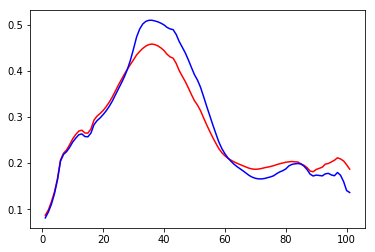

In [57]:
y_pred = knn_rgs.predict(X_test)
rms = rmse(y_pred[spectrum_num,:],y_test[spectrum_num,:])
print('Root mean squared error  for KNN is: ' + str(rms))
print('KNN score is: ' + str(knn_rgs.score(X_test, y_test)))
plt.plot(x, y_pred[spectrum_num,:], 'r', x, y_test[spectrum_num,:], 'b')

Root mean squared error  for random forest is: 0.06637568714411672
Random forest score is: 0.7742407669236377


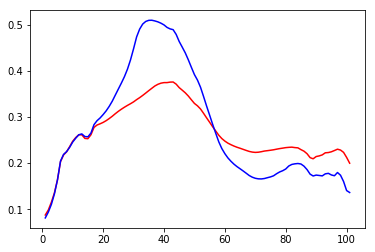

In [58]:
y_pred = rfc_rgs.predict(X_test)
rms = rmse(y_pred[spectrum_num,:],y_test[spectrum_num,:])
print('Root mean squared error  for random forest is: ' + str(rms))
print('Random forest score is: ' + str(rfc_rgs.score(X_test, y_test)))
plt.plot(x, y_pred[spectrum_num,:], 'r', x, y_test[spectrum_num,:], 'b')

Root mean squared error  for decision tree is: 0.08711785915165912
Decision tree score is: 0.5667478071574236


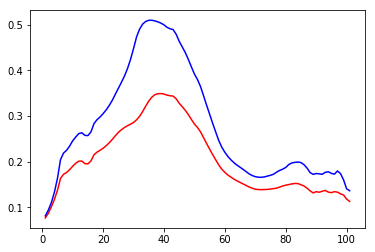

In [59]:
y_pred = tree_rgs.predict(X_test)
rms = rmse(y_pred[spectrum_num,:],y_test[spectrum_num,:])
print('Root mean squared error  for decision tree is: ' + str(rms))
print('Decision tree score is: ' + str(tree_rgs.score(X_test, y_test)))
plt.plot(x, y_pred[spectrum_num,:], 'r', x, y_test[spectrum_num,:], 'b')

Root mean squared error  for SVR is: 0.06038291600540824
SVR score is: 0.7450357615483563


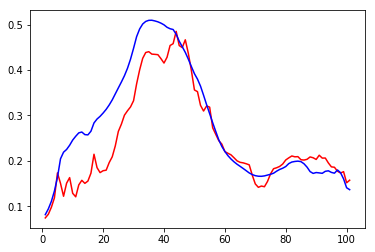

In [60]:
y_pred = morsvr_rgs.predict(X_test)
rms = rmse(y_pred[spectrum_num,:],y_test[spectrum_num,:])
print('Root mean squared error  for SVR is: ' + str(rms))
print('SVR score is: ' + str(mor_rgs.score(X_test, y_test)))
plt.plot(x, y_pred[spectrum_num,:], 'r', x, y_test[spectrum_num,:], 'b')

Root mean squared error  for Bayesian ridge is: 0.03188272020742772
Bayesian ridge score is: 0.7121594181220237


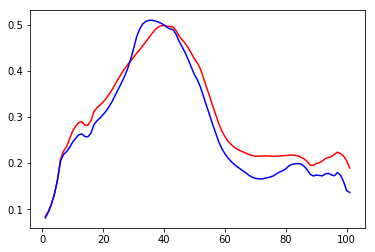

In [61]:
y_pred = morbrg_rgs.predict(X_test)
rms = rmse(y_pred[spectrum_num,:],y_test[spectrum_num,:])
print('Root mean squared error  for Bayesian ridge is: ' + str(rms))
print('Bayesian ridge score is: ' + str(morbrg_rgs.score(X_test, y_test)))
plt.plot(x, y_pred[spectrum_num,:], 'r', x, y_test[spectrum_num,:], 'b')

In [62]:
tc = [255, 0, 0]

/people/aras520/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


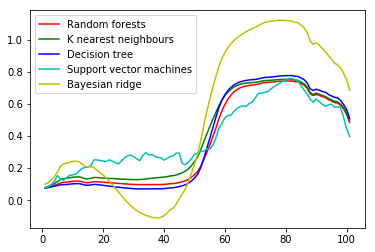

In [65]:
rec1 = np.transpose(rfc_rgs.predict(np.transpose(np.array(tc).reshape(-1,1))))
rec2 = np.transpose(knn_rgs.predict(np.transpose(np.array(tc).reshape(-1,1))))
rec3 = np.transpose(tree_rgs.predict(np.transpose(np.array(tc).reshape(-1,1))))
rec4 = np.transpose(morsvr_rgs.predict(np.transpose(np.array(tc).reshape(-1,1))))
rec5 = np.transpose(morbrg_rgs.predict(np.transpose(np.array(tc).reshape(-1,1))))
plt.plot(x, rec1, 'r', label='Random forests')
plt.plot(x, rec2, 'g', label='K nearest neighbours')
plt.plot(x, rec3, 'b', label='Decision tree')
plt.plot(x, rec4, 'c', label='Support vector machines')
plt.plot(x, rec5, 'y', label='Bayesian ridge')
plt.legend(loc='upper left', prop={'size': 10})